# Центр исследования потребительских данных. Ливерпуль

Ссылка на курс "Геопространственный анализ данных":\
https://darribas.org/gds_course/content/home.html

Ссылка на книгу "Геопространственный анализ данных":\
https://geographicdata.science/book/intro.html

Часть C\
https://darribas.org/gds_course/content/bC/diy_C.html

**Задачи проекта:**

*Задание 1. Настройка карты*

Используя три слоя (с кварталами, велодорожками, барами), выполнить следующие задачи:
*   Составить карту окрестностей Ливерпуля, со следующими параметрами настроек:
    *   Наличие заголовка;
    *   Отсутствие рамки с осями;
    *   Размер фигуры 10 на 11;
    *   Цвет единый для всех полигонов #525252 и прозрачность 50%;
    *   Ширина обводки полигонов («краев») составляет 0,3 ед. и цвет «#B9EBE3»;
    *   Базовая карта с акварельной темой Stamen.

\
*Задание 2. Непространственные манипуляции*

Используя слой с кварталами (LSOA):
*   Вычислить площадь каждого квартала;
*   Найти пять наименьших кварталов, из которых создать новый объект;
*   Создать многослойную карту Ливерпуля, на которой пять самых маленьких кварталов будут окрашены в красный цвет, а остальные — в черный.

\
*Задание 3. Различие улиц по гендерному признаку*

Используя данные УДС (загрузить самостоятельно), ответить на следующие вопросы:

*   На долю какой группы приходится большая общая длина улиц в Сарагосе: мужчин или женщин? На сколько?

## Этап 1. Загрузка данных и подготовка их к анализу

In [1]:
# Установим библиотеку 'osmnx'
! pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.7 MB/s eta 0:00:00


In [2]:
# Установим библиотеку 'contextily'
! pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 72.4 MB/s eta 0:00:00


In [57]:
# Импортируем библиотеки
import geopandas as gpd
import osmnx as ox
import contextily as cx
import matplotlib.pyplot as plt
import networkx as nx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Из библиотеки google.colab импортируем класс files
from google.colab import files

In [162]:
# Создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving E08000012.dbf to E08000012 (1).dbf
Saving E08000012.prj to E08000012 (1).prj
Saving E08000012.shp to E08000012 (1).shp
Saving E08000012.shx to E08000012 (1).shx
Saving E08000012.csv to E08000012 (1).csv


In [ ]:
# !ls /content/sample_data

In [ ]:
# !ls

### LSOA

In [163]:
# Извлечем данные с полигонами
liv = gpd.read_file('/content/E08000012.shp')

In [164]:
liv.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_OSGB 1936 ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance_Survey_of_Great_Britain_1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

### Велодорожки

In [176]:
# Извлечем данные по велосипедным дорожкам
bikepaths = ox.graph_from_place('Liverpool, UK', network_type='bike')
print(bikepaths)

MultiDiGraph with 26901 nodes and 62590 edges


In [177]:
# Определим количество линейных объектов
len(bikepaths)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


26901

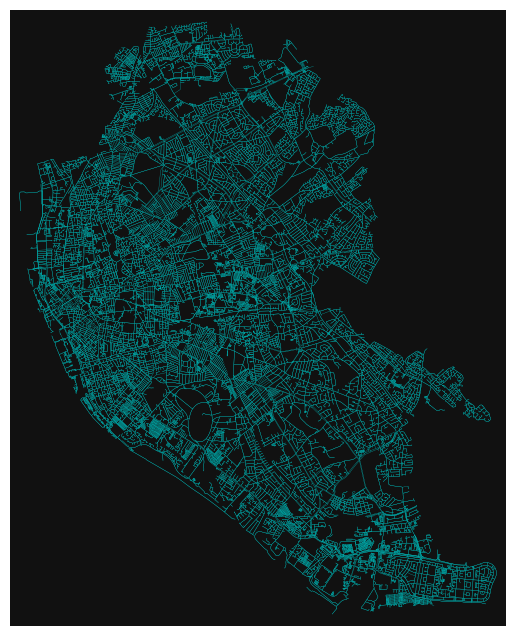

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [179]:
# Отобразим график с велосипедными дорожками
ox.plot_graph(bikepaths, node_size=0, node_color='w', edge_color='c', edge_linewidth=0.2)

In [180]:
# Проверим текущую систему координат 'bikepaths'
bikepaths.graph['crs']

'epsg:4326'

### Бары

In [181]:
# Извлечем данные точки интереса (POI) — бары
pubs = ox.geometries_from_place('Liverpool, UK', tags={'amenity':'bar'})

<ipython-input-181-c6cb58db0fe0>:2: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pubs = ox.geometries_from_place('Liverpool, UK', tags={'amenity':'bar'})


In [182]:
# Преобразуем текущую систему координат в систему, выраженную в метрах и соответствующую слою 'liv'
pubs = pubs.to_crs(liv.crs)
pubs.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_OSGB 1936 ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance_Survey_of_Great_Britain_1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<Axes: >

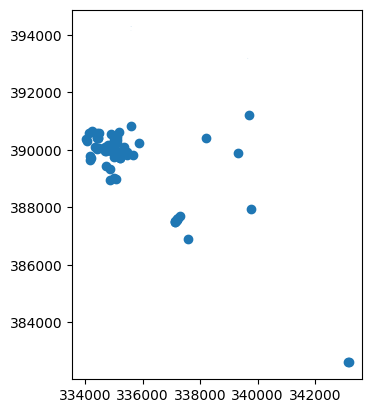

In [183]:
# Отобразим график с пабами Ливерпуля
pubs.plot()

## Этап 2. Ответы на вопросы ислледования

### Задание 1. Настройка карты

Используя три слоя (с кварталами, велодорожками, барами), выполнить следующие задачи:

* Составить карту окрестностей Ливерпуля, со следующими параметрами настроек:
   *   Наличие заголовка;
   *   Отсутствие рамки с осями;
   *   Размер фигуры 10 на 11;
   *   Цвет единый для всех полигонов #525252 и прозрачность 50%;
   *   Ширина обводки полигонов («краев») составляет 0,3 ед. и цвет «#B9EBE3»;
   *   Базоваа карту с акварельной темой Stamen.

In [184]:
# Выведем пять рандомных строчек датасета 'liv'
liv.sample(n=5, random_state=None)

,lsoa11cd,geometry,area_in_sqkm
69,E01006586,"POLYGON ((339291.871 389587.219, 339292.001 38...",0.367559
231,E01006762,"POLYGON ((337371.480 393026.250, 337364.050 39...",0.266194
177,E01006702,"POLYGON ((334624.174 393578.000, 334631.737 39...",0.195489
248,E01006780,"POLYGON ((336277.251 396930.196, 336275.865 39...",0.180354
4,E01006518,"POLYGON ((335354.015 388601.947, 335354.000 38...",0.233984


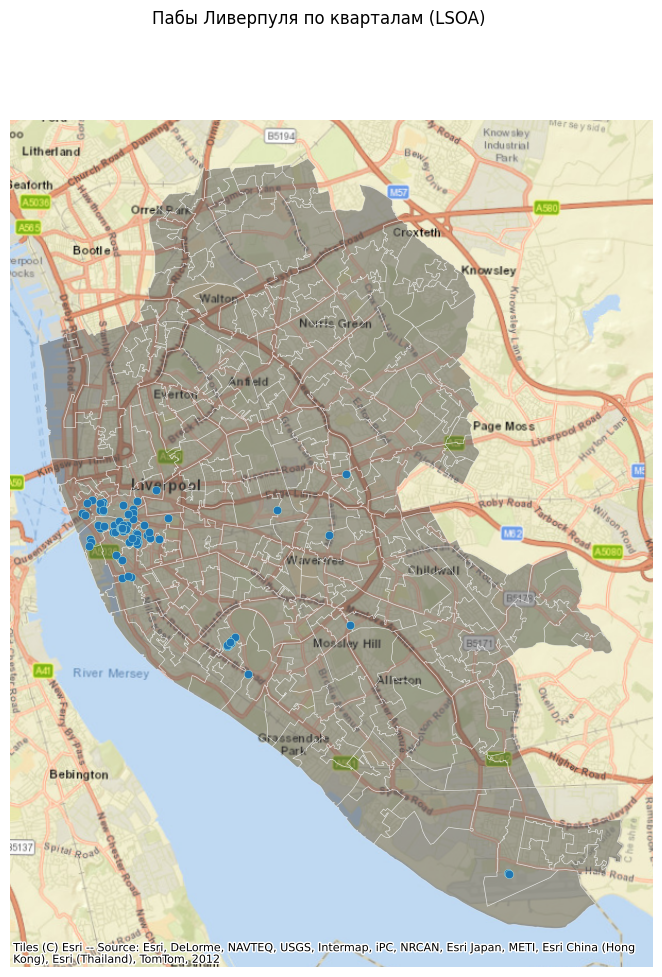

In [185]:
# Настроим фигуру и оси графика с отображением всех кварталов Ливерпуля (LSOA)
# Зададаим параметры фигуры графика
f, ax = plt.subplots(1, figsize=(10, 11))
# Добавим слой с полигонами на оси
ax = liv.plot(
    linewidth=0.5,
    facecolor='#525252',
    edgecolor='w',
    alpha=0.5,
    ax=ax
    )
# Добавим слой с пабами на оси
pubs.plot(
    linewidth=0.3,
    facecolor='r',
    edgecolor='#B9EBE3',
    alpha=1,
    ax=ax
    )
# Добавим заголовок графика
f.suptitle('Пабы Ливерпуля по кварталам (LSOA)')
# Добавим базовую карту (подоснову)
# Так как Stamen.Watercolor не отображается, заменим ее на Esri.WorldStreetMap
cx.add_basemap(
    ax=ax,
    crs=liv.crs,
    source=cx.providers.Esri.WorldStreetMap
    # alpha=0.9
    )
# Уберем на графике рамку с осями
ax.set_axis_off()
# Отобразим график
plt.show();

### Задание 2. Непространственные манипуляции



Используя слой с кварталами (LSOA):
*   Вычислить площадь каждого квартала;
*   Найти в таблице пять наименьших кварталов, создать новый объект (например, самый маленький только с ними);
*   Создать многослойную карту Ливерпуля, на которой пять самых маленьких кварталов будут окрашены в красный цвет, а остальные — в черный.

In [186]:
liv.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_OSGB 1936 ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance_Survey_of_Great_Britain_1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [187]:
# Вычислим площади каждого квартала и запишем их в отдельный столбец
liv['area_in_sqkm'] = liv.area / 1000000
liv.sample(n=5, random_state=None)

,lsoa11cd,geometry,area_in_sqkm
161,E01006686,"POLYGON ((339702.782 385401.974, 339698.999 38...",0.191374
240,E01006771,"POLYGON ((343290.202 389088.857, 343307.834 38...",0.498907
290,E01033761,"POLYGON ((335022.000 389659.625, 335020.219 38...",0.124887
115,E01006638,"POLYGON ((341799.414 392355.321, 341795.750 39...",0.220802
205,E01006734,"POLYGON ((339005.262 394968.338, 339000.000 39...",0.169999


In [188]:
# Найдем в таблице пять наименьших кварталов и создадим из них новый объект
liv_min = liv.sort_values(by='area_in_sqkm')[:5]

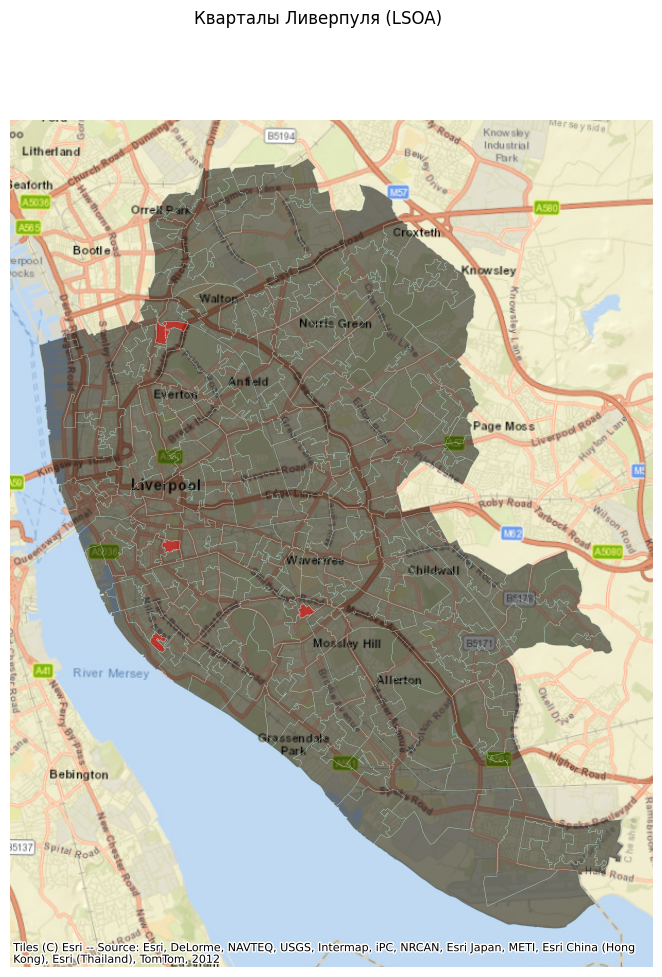

In [189]:
# Создадим новую многослойную карту Ливерпуля,
# на которой пять самых маленьких кварталов будут окрашены в красный цвет, а остальные — в черный.
# Зададаим параметры фигуры графика
f, ax = plt.subplots(1, figsize=(10, 11))
# Добавим слой с полигонами на оси
liv.plot(
    linewidth=0.3,
    facecolor='black',
    edgecolor='#B9EBE3',
    alpha=0.5,
    ax=ax
)
# Добавим слой с пятью наименьшими кварталами
liv_min.plot(
    linewidth=0.3,
    facecolor='red',
    edgecolor='#B9EBE3',
    alpha=0.5,
    ax=ax
)
# Добавим заголовок графика
f.suptitle('Кварталы Ливерпуля (LSOA)')
# Добавим базовую карту (подоснову)
# Так как Stamen.Watercolor не отображается, заменим ее на Esri.WorldStreetMap
cx.add_basemap(
    ax=ax,
    crs=liv.crs,
    source=cx.providers.Esri.WorldStreetMap
    # alpha=0.9
)
# Уберем на графике рамку с осями
ax.set_axis_off()
# Отобразим график
plt.show();

### Задание 3. Различие улиц по гендерному признаку

Используя данные УДС (загрузить самостоятельно), ответить на следующие вопросы:

*   На долю какой группы приходится большая общая длина улиц в Сарагосе: мужчин или женщин? На сколько?

In [190]:
# Загрузим УДС Сарагоса
streets = gpd.read_file('https://github.com/geochicasosm/lascallesdelasmujeres/raw/master/data/zaragoza/final_tile.geojson')
streets.sample(n=5, random_state=None)

,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry
2182,Calle de Alberto Duce,77882705,,Male,,None,None,"LINESTRING (-0.88730 41.67226, -0.88735 41.672..."
139,Calle de Cristo Rey,491364102,,Male,,None,None,"LINESTRING (-0.86732 41.69411, -0.86716 41.694..."
1793,Calle de Martín Fierro,148897461,,Male,,None,None,"LINESTRING (-0.91836 41.64506, -0.91804 41.644..."
1292,Calle Poeta Luciano Gracia,132354018,,Male,,None,None,"LINESTRING (-0.89005 41.67955, -0.89005 41.679..."
1376,Calle Mariano Esquillor Gómez,79723580,,Male,,None,None,"LINESTRING (-0.88903 41.68420, -0.88917 41.684..."


In [191]:
# Определим текущую проекцию слоя с улицами
streets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [192]:
# Перенастроим текущую проекцию на проекцию с кодом epsg:25830
streets = streets.to_crs(epsg=25830)
# Проверим правильность выполнения функции
streets.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [193]:
# Улицы, названные в честь мужчин
men = streets.loc[streets['gender']=='Male', :]
men.sample(n=5, random_state=None)

,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry
962,Calle Guillermo Fatás Cabeza,669667663,,Male,,None,None,"LINESTRING (680746.534 4615384.560, 680644.165..."
1621,Calle Miguel Roca I Junyent,78488918,,Male,,None,None,"LINESTRING (673611.481 4614185.114, 673618.836..."
1030,Calle de Manuel Jalón,136858699,,Male,,None,None,"LINESTRING (670609.532 4615506.118, 670613.671..."
739,Calle Adam,24345483,,Male,,None,None,"LINESTRING (677405.568 4612157.363, 677362.168..."
450,Calle de San Voto,24700446,,Male,,None,None,"LINESTRING (676640.757 4613534.508, 676657.316..."


In [194]:
# Улицы, названные в честь женщин
women = streets.loc[streets['gender']=='Female', :]
women.sample(n=5, random_state=None)

,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry
1012,Calle Pepa Cobos,24412038,,Female,,-,-,"LINESTRING (677932.172 4612020.544, 677893.928..."
1882,Calle de Santa Orosia,27040117,https://es.wikipedia.org/wiki/Orosia,Female,,-,-,"LINESTRING (674766.826 4613660.895, 674632.458..."
2017,Calle Emilia Pardo Bazán,117387551,https://es.wikipedia.org/wiki/Emilia_Pardo_Baz...,Female,,-,-,"LINESTRING (675447.714 4615456.969, 675353.400..."
2871,Paseo de María Agustín,136655284,https://es.wikipedia.org/wiki/Mar%C3%ADa_Agust...,Female,,-,-,"LINESTRING (675797.997 4613103.861, 675819.201..."
2357,Calle de Gertrudis Gómez de Avellaneda,121410654,https://es.wikisource.org/wiki/Autor:Gertrudis...,Female,,-,-,"LINESTRING (676044.038 4614732.088, 676074.956..."


In [195]:
# Посчитаем длину улиц, названных в честь мужчин
men['length_in_m'] = men.length
men.head(3)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry,length_in_m
0,Calle Camilo José Cela,78317710,,Male,,None,None,"LINESTRING (663603.811 4621073.573, 663567.846...",37.338828
1,Calle Mariano Domingo Ruiz,66375846,,Male,,None,None,"LINESTRING (663722.643 4621035.106, 663669.127...",104.510732
2,Calle Camilo José Cela,78317716,,Male,,None,None,"LINESTRING (663924.898 4620911.062, 663887.341...",365.969719


In [196]:
# Посчитаем длину улиц, названных в честь женщин
women['length_in_m'] = women.length
women.head(3)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry,length_in_m
11,Calle Nuestra Señora del Carmen,49025136,https://es.wikipedia.org/wiki/Virgen_del_Carmen,Female,,-,-,"LINESTRING (663963.650 4620386.530, 663849.834...",117.721112
13,Plaza Arnal Gorría,226700443,,Female,,-,-,"LINESTRING (663946.258 4620430.078, 663935.318...",65.738343
14,Calle Nuestra Señora del Carmen,38298205,https://es.wikipedia.org/wiki/Virgen_del_Carmen,Female,,-,-,"LINESTRING (664055.083 4620280.846, 664049.674...",262.099900


In [197]:
# Посчитаем общую длину улиц для "мужской" группы
men_length = men['length_in_m'].sum()
men_length

398185.6550745432

In [198]:
# Посчитаем общую длину улиц для "женской" группы
women_length = women['length_in_m'].sum()
women_length

89069.23496393918

**Ответ:** На долю мужской группы приходится набольшая общая длина улиц в Сарагосе.

In [199]:
# Посчитаем на сколько общая длина улиц, названных в честь мужчин больше общей длины улиц, названных в честь женщин
length_diff = men_length - women_length
length_diff

309116.420110604

**Ответ:** На 309116 м (309,2 км) общая длина улиц, названных в честь мужчин больше общей длины улиц, названных в честь женщин.

In [200]:
# Посчитаем долю улиц, названных в честь мужчин, относительно общей длины улиц
men_share = round(men_length / (men_length + women_length) * 100, 1)
men_share

81.7

In [201]:
# Посчитаем долю улиц, названных в честь женщин, относительно общей длины улиц
women_share = round(women_length / (men_length + women_length) * 100, 1)
women_share

18.3

**Ответ:** Доля улиц, названных в честь мужчин, от общей длины улиц составляет 81.7%, в честь женщин — 18.3%.

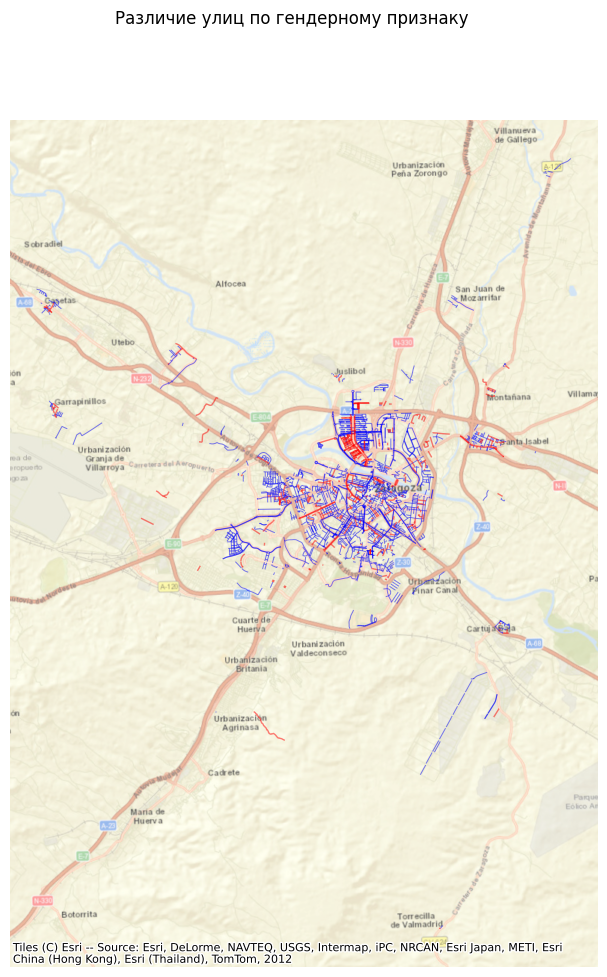

In [202]:
# Нанесем улицы, разбитые на группы, на карту
# Пусть улицы, названные в честь мужчин, будут отображены синим цветом, в честь женщин — красным
# Зададаим параметры фигуры графика
f, ax = plt.subplots(1, figsize=(10, 11))
# Добавим слой c улицами, названными в честь мужчин
men.plot(
    linewidth=0.7,
    facecolor='blue',
    edgecolor='blue',
    alpha=0.5,
    ax=ax
)
# Добавим слой c улицами, названными в честь женщин
women.plot(
    linewidth=1,
    facecolor='red',
    edgecolor='red',
    alpha=0.5,
    ax=ax
)
# Добавим заголовок графика
f.suptitle('Различие улиц по гендерному признаку')
# Добавим базовую карту (подоснову)
# Так как Stamen.Watercolor не отображается, заменим ее на Esri.WorldStreetMap
cx.add_basemap(
    ax=ax,
    crs=men.crs,
    source=cx.providers.Esri.WorldStreetMap,
    alpha=0.7
)
# Уберем на графике рамку с осями
ax.set_axis_off()
# Отобразим график
plt.show();

## Этап 3. Результаты исследования

### Выводы

1. Была составлена карта окрестностей Ливерпуля, с рядом заданных параметров настроек;

2. На основании слоя с кварталами Ливерпуля (LSOA):
   *   Вычеслена площадь каждого квартала;
   *   Найдены пять наименьших кварталов, из которых был создан новый объект;
   *   Создана многослойная карта Ливерпуля, на которой пять самых маленьких кварталов окрашены в красный цвет, а остальные — в черный;
   
3. Используя данные УДС Сарагоса, был проведен краткий анализ различия улиц по гендерному признаку:
   *   На 309116 м (309,2 км) общая длина улиц, названных в честь мужчин больше общей длины улиц, названных в честь женщин;
   *   Доля улиц, названных в честь мужчин, от общей длины улиц составляет 81.7%, в честь женщин — 18.3%.